In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string

In [2]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Consultant\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
url = 'data.csv'
df1 = pd.read_csv(url,encoding = 'unicode_escape')
df1

,title,content,date,variant,images,verified,author,rating,product,url
0,Do not pay an activation fee!,We now have three of these devices in our home...,01 Nov 2019,Style: Roku Express HD,NaN,Verified Purchase,Rose Dawson,5.0,Roku Express | HD Streaming Media Player with ...,https://www.amazon.com/product-reviews/B07WVFC...
1,Should have got one years ago,I finally decided to buy one to help keep my T...,16 Oct 2019,Style: Roku Express HD,NaN,Verified Purchase,Mike T,5.0,Roku Express | HD Streaming Media Player with ...,https://www.amazon.com/product-reviews/B07WVFC...
2,"My Neck, My Back, My NETFLIX and my SNACKS!!!","I have been working on overtime, a 2nd job and...",28 Oct 2019,Style: Roku Express HD,NaN,Verified Purchase,Rachel in Florida,5.0,Roku Express | HD Streaming Media Player with ...,https://www.amazon.com/product-reviews/B07WVFC...
3,Bare-Boned Unit Works Great!,I bought this Roku to expand into a fourth roo...,19 Oct 2019,Style: Roku Express HD,NaN,Verified Purchase,Dee Arr,5.0,Roku Express | HD Streaming Media Player with ...,https://www.amazon.com/product-reviews/B07WVFC...
4,FANTASTIC device for the price!,This is my 5th Roku and it works just as good ...,15 Oct 2019,Style: Roku Express HD,NaN,Verified Purchase,KJinthe417,5.0,Roku Express | HD Streaming Media Player with ...,https://www.amazon.com/product-reviews/B07WVFC...
...,...,...,...,...,...,...,...,...,...,...
5535,HDMI switch/splitter users BEWARE!,"Overall, was I eventually moderately satisfied...",16 Oct 2019,Style: Roku Express HD,NaN,Verified Purchase,DavyMac,4.0,Roku Express | HD Streaming Media Player with ...,https://www.amazon.com/product-reviews/B07WVFC...
5536,Beware of Activation Fee,I had to return it today though I only had it ...,27 Oct 2019,Style: Roku Express HD,NaN,Verified Purchase,mike,1.0,Roku Express | HD Streaming Media Player with ...,https://www.amazon.com/product-reviews/B07WVFC...
5537,Be very careful!,I just bought this product and when I attempte...,09 Jan 2020,Style: Roku Express HD,NaN,Verified Purchase,robert mullins,1.0,Roku Express | HD Streaming Media Player with ...,https://www.amazon.com/product-reviews/B07WVFC...
5538,Notice (Single Band Wireless),Why have they gone backwards from a few years ...,11 Oct 2019,Style: Roku Express HD,NaN,NaN,Rokair,2.0,Roku Express | HD Streaming Media Player with ...,https://www.amazon.com/product-reviews/B07WVFC...


In [4]:
review=pd.DataFrame(df1.groupby('rating').size().sort_values(ascending=False).rename('No of Users').reset_index())
review.head()

,rating,No of Users
0,5.0,3324
1,1.0,1108
2,2.0,554
3,4.0,554


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5540 entries, 0 to 5539
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   title     5540 non-null   object 
 1   content   5540 non-null   object 
 2   date      5540 non-null   object 
 3   variant   5540 non-null   object 
 4   images    0 non-null      float64
 5   verified  4986 non-null   object 
 6   author    5540 non-null   object 
 7   rating    5540 non-null   float64
 8   product   5540 non-null   object 
 9   url       5540 non-null   object 
dtypes: float64(2), object(8)
memory usage: 432.9+ KB


In [6]:
df1.drop(["variant","date","title",'images','author','product','url','verified'], axis=1, inplace=True)
df1

,content,rating
0,We now have three of these devices in our home...,5.0
1,I finally decided to buy one to help keep my T...,5.0
2,"I have been working on overtime, a 2nd job and...",5.0
3,I bought this Roku to expand into a fourth roo...,5.0
4,This is my 5th Roku and it works just as good ...,5.0
...,...,...
5535,"Overall, was I eventually moderately satisfied...",4.0
5536,I had to return it today though I only had it ...,1.0
5537,I just bought this product and when I attempte...,1.0
5538,Why have they gone backwards from a few years ...,2.0


In [7]:
df1.isnull().sum()

content    0
rating     0
dtype: int64

In [8]:
data = df1.dropna()
data.isnull().sum()

content    0
rating     0
dtype: int64

In [9]:
review = data.rename(columns={"content":"reviews.text","rating":"reviews.rating"})
review

,reviews.text,reviews.rating
0,We now have three of these devices in our home...,5.0
1,I finally decided to buy one to help keep my T...,5.0
2,"I have been working on overtime, a 2nd job and...",5.0
3,I bought this Roku to expand into a fourth roo...,5.0
4,This is my 5th Roku and it works just as good ...,5.0
...,...,...
5535,"Overall, was I eventually moderately satisfied...",4.0
5536,I had to return it today though I only had it ...,1.0
5537,I just bought this product and when I attempte...,1.0
5538,Why have they gone backwards from a few years ...,2.0


In [10]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5540 entries, 0 to 5539
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviews.text    5540 non-null   object 
 1   reviews.rating  5540 non-null   float64
dtypes: float64(1), object(1)
memory usage: 86.7+ KB


In [11]:
review['reviews.rating'].value_counts()

5.0    3324
1.0    1108
4.0     554
2.0     554
Name: reviews.rating, dtype: int64

C:\Users\Consultant\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


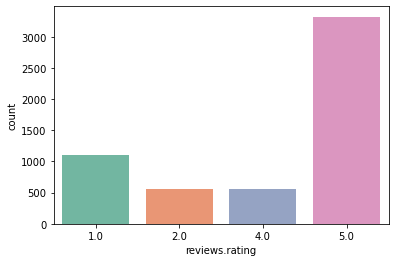

In [12]:
sns.countplot(review['reviews.rating'],palette ='Set2')
plt.ylabel=('count')
plt.xlabel=('rating')
plt.show()

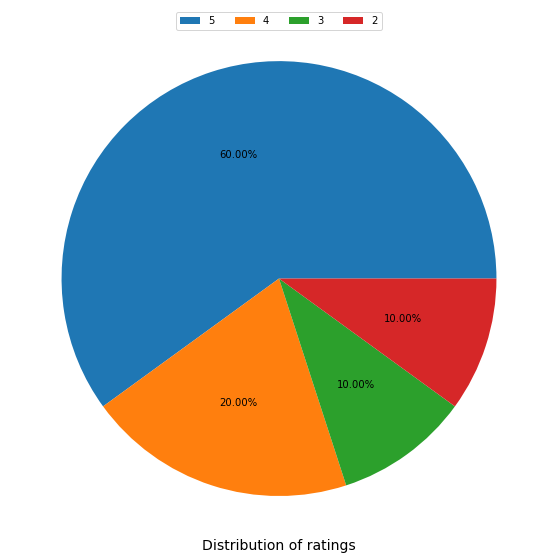

In [13]:
plt.figure(figsize = (10, 10))
label=[5,4,3,2,1,'Missing']
plt.pie(review['reviews.rating'].value_counts(), autopct='%0.2f%%')
plt.legend(label, ncol=6, loc=9)
plt.title('Distribution of ratings', size=14, y=-0.01)
plt.show()

Data PreProcessing

In [14]:
sentiment = {1: 0,2: 0,3: 2,4: 1,5: 1}

In [15]:
review['sentiment']=review['reviews.rating'].map(sentiment)

In [16]:
review['sentiment'].value_counts()

1    3878
0    1662
Name: sentiment, dtype: int64

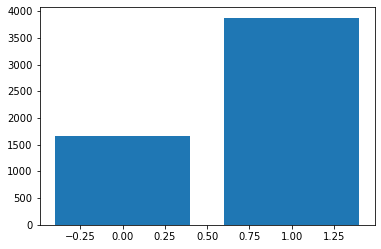

In [17]:
counts=review['sentiment'].value_counts()
plt.bar(counts.index, counts.values)
plt.show()

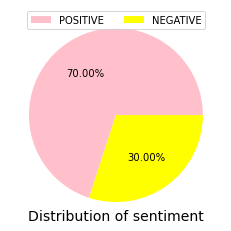

In [18]:
labels = ['POSITIVE', 'NEGATIVE']
colors = ['Pink', 'Yellow']
plt.pie(review['sentiment'].value_counts(), autopct='%0.2f%%',colors=colors)

plt.title('Distribution of sentiment', size=14, y=-0.01)
plt.legend(labels, ncol=3, loc=9)
plt.show()

In [19]:
words = pd.Series(' '.join(review['reviews.text']).split())
words

0                   We
1                  now
2                 have
3                three
4                   of
              ...     
1020463             TV
1020464            and
1020465           slow
1020466            DSL
1020467    connection.
Length: 1020468, dtype: object

In [20]:
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer

In [21]:
stopword_list = stopwords.words('english')
suitable_stopwords=[]
l =["n'",'nor','no','not']
for i in stopword_list:
    if not any(words in i for words in l):
        suitable_stopwords.append(i)
print(len(stopword_list))
print(len(suitable_stopwords))
print(stopword_list)
print(suitable_stopwords)

179
157
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', '

In [22]:
suitable_stopwords=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you','' "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should','play','playing','tablet','use','get','kindel','read','book','device','year','time','want', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y']
replace_list=['ain','hate','bad','worse', 'aren', 'couldn', 'didn', 'doesn', 'hadn', 'hasn', 'haven', 'isn', 'mightn', 'mustn', 'needn',
              'shan', 'shouldn', 'wasn', 'weren', 'won', 'wouldn',"n't","n'"]

In [23]:
def cleanstr(text):
    text=text.lower()
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
    text = re.sub('\s+', ' ', text)
    text = re.sub(' \d+', ' ', text)
    return text

In [24]:
def remove_stopwords(stmt):
    filtered_sentence = []
    stmt=stmt.lower()
    words = word_tokenize(stmt)
    
    for w in words:
        if w not in suitable_stopwords:
            if w not in replace_list:
                filtered_sentence.append(w)
            else:
                filtered_sentence.append(w+' not')
    return " ".join(filtered_sentence)

In [49]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.ADJ

In [26]:
def lemmatize(text):
    wl = WordNetLemmatizer()
    lemmatized_sentence = []
    # Tokenize the sentence
    words = word_tokenize(text)
    word_pos_tags = nltk.pos_tag(words)
    for idx, tag in enumerate(word_pos_tags):
        lemmatized_sentence.append(wl.lemmatize(tag[0], get_wordnet_pos(tag[1])))

    return " ".join(lemmatized_sentence)

In [27]:
nltk.download('omw-1.4')
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Consultant\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Consultant\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Consultant\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Consultant\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
error, reliable, 

In [50]:
review['text']=review['reviews.text'].apply(cleanstr)
review['text']=review['text'].apply(remove_stopwords)
review['text']=review['text'].apply(lemmatize)
review['text']

0       three device home help save cable bill spectru...
1       finally decide buy one help keep tv relevant a...
2       work overtime nd job damn nerve spend money ca...
3       buy roku expand fourth room happy see offer fr...
4       th roku work good rest scar ghz wireless conne...
                              ...                        
5535    overall eventually moderately satisfied initia...
5536    return today though day reason activation fee ...
5537    bought product attempt activate come error inf...
5538    go backwards year ago produce new device first...
5539    lil great price set difficult even luddite lik...
Name: text, Length: 5540, dtype: object

In [51]:
review

,reviews.text,reviews.rating,sentiment,text,random_number
0,We now have three of these devices in our home...,5.0,1,three device home help save cable bill spectru...,0.273798
1,I finally decided to buy one to help keep my T...,5.0,1,finally decide buy one help keep tv relevant a...,1.953780
2,"I have been working on overtime, a 2nd job and...",5.0,1,work overtime nd job damn nerve spend money ca...,-0.097461
3,I bought this Roku to expand into a fourth roo...,5.0,1,buy roku expand fourth room happy see offer fr...,0.776764
4,This is my 5th Roku and it works just as good ...,5.0,1,th roku work good rest scar ghz wireless conne...,1.060792
...,...,...,...,...,...
5535,"Overall, was I eventually moderately satisfied...",4.0,1,overall eventually moderately satisfied initia...,1.229886
5536,I had to return it today though I only had it ...,1.0,0,return today though day reason activation fee ...,0.444582
5537,I just bought this product and when I attempte...,1.0,0,bought product attempt activate come error inf...,0.779947
5538,Why have they gone backwards from a few years ...,2.0,0,go backwards year ago produce new device first...,-0.253924


In [52]:
positive = review[review['sentiment'] == 1]
negative = review[review['sentiment'] == 0]

In [53]:
positive

,reviews.text,reviews.rating,sentiment,text,random_number
0,We now have three of these devices in our home...,5.0,1,three device home help save cable bill spectru...,0.273798
1,I finally decided to buy one to help keep my T...,5.0,1,finally decide buy one help keep tv relevant a...,1.953780
2,"I have been working on overtime, a 2nd job and...",5.0,1,work overtime nd job damn nerve spend money ca...,-0.097461
3,I bought this Roku to expand into a fourth roo...,5.0,1,buy roku expand fourth room happy see offer fr...,0.776764
4,This is my 5th Roku and it works just as good ...,5.0,1,th roku work good rest scar ghz wireless conne...,1.060792
...,...,...,...,...,...
5532,"I have been working on overtime, a 2nd job and...",5.0,1,work overtime nd job damn nerve spend money ca...,-0.312518
5533,I bought this Roku to expand into a fourth roo...,5.0,1,buy roku expand fourth room happy see offer fr...,1.117455
5534,This is my 5th Roku and it works just as good ...,5.0,1,th roku work good rest scar ghz wireless conne...,1.219378
5535,"Overall, was I eventually moderately satisfied...",4.0,1,overall eventually moderately satisfied initia...,1.229886


In [54]:
review.columns

Index(['reviews.text', 'reviews.rating', 'sentiment', 'text', 'random_number'], dtype='object')

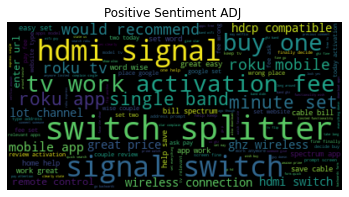

In [57]:
pos = " ".join(review for review in positive.text)
wordcloud2 = WordCloud(stopwords=suitable_stopwords).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.title("Positive Sentiment ADJ ")
plt.savefig('positivewordcloud33.png')
plt.show()

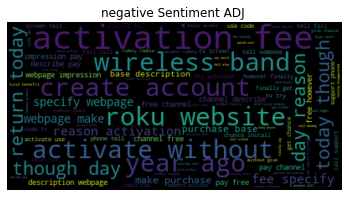

In [59]:
neg = " ".join(review for review in negative.text)
wordcloud3 = WordCloud(stopwords=replace_list).generate(neg)
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.title("negative Sentiment ADJ ")
plt.savefig('negative wordcloud33.png')
plt.show()

In [34]:
review['sentiment'].value_counts()

1    3878
0    1662
Name: sentiment, dtype: int64

In [35]:
index = review.index
review['random_number'] = np.random.randn(len(index))
train = review[review['random_number'] <= 0.8]
test = review[review['random_number'] > 0.8]

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

In [37]:
train

,reviews.text,reviews.rating,sentiment,text,random_number
0,We now have three of these devices in our home...,5.0,1,three device home help save cable bill spectru...,0.273798
2,"I have been working on overtime, a 2nd job and...",5.0,1,work overtime nd job damn nerve spend money ca...,-0.097461
3,I bought this Roku to expand into a fourth roo...,5.0,1,buy roku expand fourth room happy see offer fr...,0.776764
5,"Overall, was I eventually moderately satisfied...",4.0,1,overall eventually moderately satisfied initia...,-1.077765
6,I had to return it today though I only had it ...,1.0,0,return today though day reason activation fee ...,-1.331493
...,...,...,...,...,...
5531,I finally decided to buy one to help keep my T...,5.0,1,finally decide buy one help keep tv relevant a...,0.071096
5532,"I have been working on overtime, a 2nd job and...",5.0,1,work overtime nd job damn nerve spend money ca...,-0.312518
5536,I had to return it today though I only had it ...,1.0,0,return today though day reason activation fee ...,0.444582
5537,I just bought this product and when I attempte...,1.0,0,bought product attempt activate come error inf...,0.779947


In [38]:
tfidf = TfidfVectorizer()
train_matrix = tfidf.fit_transform(train['text'])
test_matrix = tfidf.transform(test['text'])

In [39]:
train_matrix
test_matrix

<1143x425 sparse matrix of type '<class 'numpy.float64'>'
	with 70773 stored elements in Compressed Sparse Row format>

In [40]:
clf = LinearSVC()

In [41]:
X_train = train_matrix
X_test = test_matrix
y_train = train['sentiment']
y_test = test['sentiment']

In [42]:
clf.fit(X_train,y_train)

LinearSVC()

In [43]:
predictions = clf.predict(X_test)

In [44]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))
clf.score(X_train, y_train)

[[349   0]
 [  0 794]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       349
           1       1.00      1.00      1.00       794

    accuracy                           1.00      1143
   macro avg       1.00      1.00      1.00      1143
weighted avg       1.00      1.00      1.00      1143



1.0

In [45]:
text="This is a fine calculator. It works great. Has more functions than I'll probably ever use. Then why do I not recommend it?There is a design flaw.I have attached 3 photos where you see the screen. You'll notice that when you turn the calculator on and look at it from an angle (as you would if you kept it on a desk while you were testing) the numbers are not legible. Your line of sight has to be almost perpendicular or direct to see it clearly. This does not affect the function of the calculator but it gets inconvenient when you have to hover over the calculator or lift it up to read it. In a test taking setting this constant movement was suspicious enough to warrant a warning from the proctor. "
text=cleanstr(text)
text=remove_stopwords(text)
text=(lemmatize(text))
print(text)

fine calculator work great function probably ever recommend design flaw attach photo see screen notice turn calculator look angle would keep desk test number legible line sight almost perpendicular direct see clearly affect function calculator get inconvenient hover calculator lift test take set constant movement suspicious enough warrant warning proctor


In [47]:
vec=tfidf.transform([text])
pre=clf.predict(vec)
if pre==0:
    print("Negative")
else:
    print("Positive")

Positive
